In [15]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import time

In [2]:
load_dotenv()

llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

In [7]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'GenZ'}, config=config1)

{'topic': 'GenZ',
 'joke': 'Why did GenZ refuse to play hide and seek with Millennials? Because they knew the Millennials would just snapchat their hiding spots!',
 'explanation': 'This joke plays on the stereotype that Millennials are obsessed with social media, specifically Snapchat. GenZ refuses to play hide and seek with Millennials because they know that Millennials would most likely just snap their hiding spots instead of actually playing the game. This implies that Millennials prioritize documenting their experiences on social media over actually engaging in real-life activities.'}

In [8]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'GenZ', 'joke': 'Why did GenZ refuse to play hide and seek with Millennials? Because they knew the Millennials would just snapchat their hiding spots!', 'explanation': 'This joke plays on the stereotype that Millennials are obsessed with social media, specifically Snapchat. GenZ refuses to play hide and seek with Millennials because they know that Millennials would most likely just snap their hiding spots instead of actually playing the game. This implies that Millennials prioritize documenting their experiences on social media over actually engaging in real-life activities.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-efa8-6b38-8002-8ee1790f9eea'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:05:28.701410+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-dcf2-68e0-8001-a6410f5cda56'}}, ta

In [9]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'GenZ', 'joke': 'Why did GenZ refuse to play hide and seek with Millennials? Because they knew the Millennials would just snapchat their hiding spots!', 'explanation': 'This joke plays on the stereotype that Millennials are obsessed with social media, specifically Snapchat. GenZ refuses to play hide and seek with Millennials because they know that Millennials would most likely just snap their hiding spots instead of actually playing the game. This implies that Millennials prioritize documenting their experiences on social media over actually engaging in real-life activities.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-efa8-6b38-8002-8ee1790f9eea'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:05:28.701410+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-dcf2-68e0-8001-a6410f5cda56'}}, t

In [10]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'Gen alpha'}, config=config2)

{'topic': 'Gen alpha',
 'joke': 'Why did Gen Alpha bring a ladder to the playground? \nBecause they heard the slide was Gen Beta testing!',
 'explanation': 'This joke plays on the idea of different generations, with Gen Alpha being the youngest generation and Gen Beta being slightly older. The joke suggests that Gen Alpha brought a ladder to the playground because they heard the slide was "Gen Beta testing," a play on words that means the slide was being tested by the older generation. It\'s a light-hearted play on the idea of testing and generations, and the absurdity of a child bringing a ladder to a playground for that reason.'}

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Gen alpha', 'joke': 'Why did Gen Alpha bring a ladder to the playground? \nBecause they heard the slide was Gen Beta testing!', 'explanation': 'This joke plays on the idea of different generations, with Gen Alpha being the youngest generation and Gen Beta being slightly older. The joke suggests that Gen Alpha brought a ladder to the playground because they heard the slide was "Gen Beta testing," a play on words that means the slide was being tested by the older generation. It\'s a light-hearted play on the idea of testing and generations, and the absurdity of a child bringing a ladder to a playground for that reason.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0741e5-381b-6596-8002-3fdabe73273b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-08T06:10:04.733575+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': 

In [14]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Gen alpha', 'joke': 'Why did Gen Alpha bring a ladder to the playground? \nBecause they heard the slide was Gen Beta testing!', 'explanation': 'This joke plays on the idea of different generations, with Gen Alpha being the youngest generation and Gen Beta being slightly older. The joke suggests that Gen Alpha brought a ladder to the playground because they heard the slide was "Gen Beta testing," a play on words that means the slide was being tested by the older generation. It\'s a light-hearted play on the idea of testing and generations, and the absurdity of a child bringing a ladder to a playground for that reason.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0741e5-381b-6596-8002-3fdabe73273b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-08T06:10:04.733575+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id':

Time Travel

In [26]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0741da-ce86-6090-8000-83066a8e6a05"}})

StateSnapshot(values={'topic': 'GenZ'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0741da-ce86-6090-8000-83066a8e6a05'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:05:25.226915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-ce84-647a-bfff-61ece6286a6f'}}, tasks=(PregelTask(id='146bdb80-81b0-1ef1-2d8a-4ede9cbf3b21', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did GenZ refuse to play hide and seek with Millennials? Because they knew the Millennials would just snapchat their hiding spots!'}),), interrupts=())

In [27]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0741da-ce86-6090-8000-83066a8e6a05"}})

{'topic': 'GenZ',
 'joke': 'Why did the Gen Z-er bring a ladder to the bar? \nBecause they heard the drinks were on a high shelf!',
 'explanation': 'This joke is playing on the stereotype that members of Generation Z, known for their youthfulness and love of technology, may not be old enough to drink legally. By bringing a ladder to the bar, they are trying to humorously suggest that they need to physically reach up high to get to the drinks, as if they are too short or too young to access them easily. The punchline reveals that the reason for bringing the ladder is simply to reach the drinks on the high shelf, rather than for any other purpose.'}

In [28]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'GenZ', 'joke': 'Why did the Gen Z-er bring a ladder to the bar? \nBecause they heard the drinks were on a high shelf!', 'explanation': 'This joke is playing on the stereotype that members of Generation Z, known for their youthfulness and love of technology, may not be old enough to drink legally. By bringing a ladder to the bar, they are trying to humorously suggest that they need to physically reach up high to get to the drinks, as if they are too short or too young to access them easily. The punchline reveals that the reason for bringing the ladder is simply to reach the drinks on the high shelf, rather than for any other purpose.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074216-3519-6632-8002-1de46f59be05'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:31:59.751916+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 

Updating State

In [32]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0741da-ce86-6090-8000-83066a8e6a05", "checkpoint_ns": ""}}, {'topic':'Millennials'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f074222-440c-6818-8001-a99beec67888'}}

In [30]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Millennials'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07421d-4f44-6474-8001-e464366546a1'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:35:10.400616+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741da-ce86-6090-8000-83066a8e6a05'}}, tasks=(PregelTask(id='9003fe0f-116d-6bc2-48e1-a830d46ef53d', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'GenZ', 'joke': 'Why did the Gen Z-er bring a ladder to the bar? \nBecause they heard the drinks were on a high shelf!', 'explanation': 'This joke is playing on the stereotype that members of Generation Z, known for their youthfulness and love of technology, may not be old enough to drink legally. By bringing a ladder to th

In [33]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f074222-440c-6818-8001-a99beec67888"}})

{'topic': 'Millennials',
 'joke': 'Why did the Millennial always bring a ladder to work?\n\nBecause they heard the only way to climb the corporate ladder is by literally bringing a ladder!',
 'explanation': 'This joke is poking fun at the stereotype that Millennials are ambitious and eager to climb the corporate ladder quickly. The punchline plays on the idiom "climbing the corporate ladder," which means advancing in a company or organization. By taking the saying literally and bringing a ladder to work, the Millennial in the joke is humorously demonstrating their determination to succeed in their career. It highlights the idea that Millennials are willing to go to extreme lengths or take unconventional routes to achieve their goals.'}

In [34]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Millennials', 'joke': 'Why did the Millennial always bring a ladder to work?\n\nBecause they heard the only way to climb the corporate ladder is by literally bringing a ladder!', 'explanation': 'This joke is poking fun at the stereotype that Millennials are ambitious and eager to climb the corporate ladder quickly. The punchline plays on the idiom "climbing the corporate ladder," which means advancing in a company or organization. By taking the saying literally and bringing a ladder to work, the Millennial in the joke is humorously demonstrating their determination to succeed in their career. It highlights the idea that Millennials are willing to go to extreme lengths or take unconventional routes to achieve their goals.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074222-e49d-6566-8003-4e1d2500aeb6'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T06:37

Fault Tolerance

In [16]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [18]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [19]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

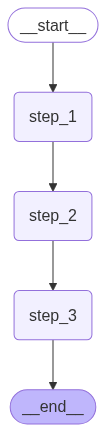

In [20]:
graph

In [21]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [22]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a203-641c-8001-f2babe1e25d1'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T06:19:39.553070+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a200-6190-8000-4a9f664b5800'}}, tasks=(PregelTask(id='741fc7c6-9e1f-a5bc-49d9-3f1bc7b49860', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [23]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a203-641c-8001-f2babe1e25d1'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T06:19:39.553070+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a200-6190-8000-4a9f664b5800'}}, tasks=(PregelTask(id='741fc7c6-9e1f-a5bc-49d9-3f1bc7b49860', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a200-6190-8000-4a9f664b5800'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T06:19:39.551775+00:00', parent_config={'configurable': 

In [24]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [25]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f074203-1a07-62da-8003-ab4b145b6201'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T06:23:26.885946+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f074203-1a02-6622-8002-9a8bedcf717b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f074203-1a02-6622-8002-9a8bedcf717b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T06:23:26.883969+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0741fa-a203-641c-8001-f2babe1e25d1'}}, tasks=(